# Module 4: Anomaly Detection
## Cumulative Exercise:
### Outlier Detection for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

# path to dataset
DATASET = '/dsa/data/all_datasets/autoMPG-1.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_csv(DATASET, index_col=0).dropna().sample(frac=1).reset_index(drop = True)
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000
mean,22.151443,5.824960,196.756004,477.616796,8.785400e+05,15.538771,82.095406,1.569740
std,8.817102,2.720733,111.032114,1411.463705,3.249376e+06,2.729471,29.467660,0.799426
min,3.625937,-0.743522,-19.283003,46.000000,1.613000e+03,8.000000,-18.076791,1.000000
25%,16.000000,4.000000,102.500000,78.000000,2.259500e+03,13.700000,73.000000,1.000000
50%,21.500000,5.056846,151.000000,96.000000,2.930000e+03,15.500000,76.000000,1.000000
75%,28.050000,8.000000,302.000000,145.000000,3.860000e+03,17.000000,80.000000,2.000000
max,46.600000,31.872541,604.080466,10222.846370,1.879313e+07,24.800000,284.100062,3.000000


In [3]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,31.8,4.0,85.0,65.0,2020.0,19.2,79.0,3,datsun 210
1,20.2,6.0,232.0,90.0,3265.0,18.2,79.0,1,amc concord dl 6
2,35.0,4.0,122.0,88.0,2500.0,15.1,80.0,2,triumph tr7 coupe
3,23.0,4.0,115.0,95.0,2694.0,15.0,75.0,2,audi 100ls
4,32.8,4.0,78.0,52.0,1985.0,19.4,78.0,3,mazda glc deluxe


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [9]:
# Complete code below this comment  (Question #001)
# ----------------------------------

X= dataset.iloc[:,1:]
y= dataset.iloc[:,0]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,4.0,85.0,65.0,2020.0,19.2,79.0,3,datsun 210
1,6.0,232.0,90.0,3265.0,18.2,79.0,1,amc concord dl 6
2,4.0,122.0,88.0,2500.0,15.1,80.0,2,triumph tr7 coupe
3,4.0,115.0,95.0,2694.0,15.0,75.0,2,audi 100ls
4,4.0,78.0,52.0,1985.0,19.4,78.0,3,mazda glc deluxe


Create training/validation split with 30% held out. 

In [10]:
# Complete code below this comment  (Question #E002)
# ----------------------------------
X=pd.get_dummies(X,drop_first=True)
X=X.values
y=y.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12) 

# verify split shapes and contents
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (296, 307)
y_train.shape:  (296,)
X_test.shape:  (127, 307)
y_test.shape:  (127,)


Fit a Ridge regressor without anomaly detection and report R^2 measure on the train set.

In [11]:
# Complete code below this comment  (Question #E003)
# ----------------------------------

from sklearn.metrics import r2_score
naive_model = Ridge() #P4003
scores = cross_val_score(estimator=naive_model, X=X_train, y=y_train,cv=5)
print("Scores: ", scores)
print("Mean score (5 folds): ", np.mean(scores))

naive_model.fit(X_train,y_train)
prediction = naive_model.predict(X_train)
print("R2_Score on training set : ",r2_score(y_train,prediction))

Scores:  [0.49562498 0.58767054 0.03368006 0.48749253 0.62509116]
Mean score (5 folds):  0.4459118540363966
R2_Score on training set :  0.8498959138722499


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=4.40919e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=4.0461e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=6.23684e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=4.27282e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning:

Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>. Report R^2 measure.

In [12]:
# Complete code below this comment  (Question #E004)
# ----------------------------------


naive_predictions = naive_model.predict(X_test)
print("R2_Score on test set : ",r2_score(y_test,naive_predictions))


R2_Score on test set :  0.5895219052333844


Create a scatter plot of y_test against naive predictions.  
The following is for reference.

~~~python
plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()
~~~

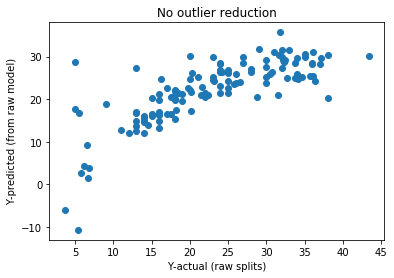

In [13]:
# Complete code below this comment  (Question #E005)
# ----------------------------------
plt.scatter(y_test, naive_predictions)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()


### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [14]:
# Complete code below this comment  (Question #E006)
# ----------------------------------

from sklearn.ensemble import IsolationForest

# Construct IsolationForest 
iso_forest = IsolationForest(contamination=0.05).fit(X_train, y_train)

# Get labels from classifier and cull outliers #P4006
iso_outliers = iso_forest.predict(X)==-1
print(f"Num of outliers = {np.sum(iso_outliers)}")
X_iso = X[~iso_outliers]
y_iso = y[~iso_outliers]

Num of outliers = 20


Create training/test set with the removal of outliers from the above training/test set. 

In [15]:
# Complete code below this comment  (Question #E007)
# ----------------------------------



X_iso_train, X_iso_test, y_iso_train, y_iso_test = train_test_split(X_iso,y_iso,test_size=0.3,random_state=12) 



Fit a new model against inliers and print score (R^2) for the model.

In [16]:
# Complete code below this comment  (Question #E008)
# ----------------------------------


from sklearn.linear_model import LinearRegression


iso_model = LinearRegression()
iso_model.fit(X_iso_train, y_iso_train)

iso_predictions = iso_model.predict(X_iso_train)
print("R2_score without outliers for training set: ",r2_score(y_iso_train, iso_predictions))





R2_score without outliers for training set:  0.9790280680317692


Predict with the test set, report R^2, and plot y-actual against y-predicted again for labels in testing set.

R2_score without outliers for test set:  0.4323241254335154


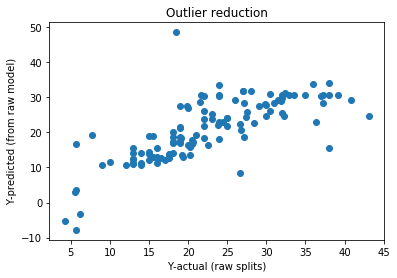

In [19]:
# Complete code below this comment  (Question #E009)
# ----------------------------------



iso_predictions = iso_model.predict(X_iso_test)
print("R2_score without outliers for test set: ",r2_score(y_iso_test, iso_predictions))

plt.scatter(y_iso_test, iso_predictions)
plt.title("Outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()


Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [1]:
# Complete code below this comment  (Question #E010)
# ----------------------------------
import pickle
filename = 'my_module_4_model.pkl'
pickle.dump(iso_model, open(filename, 'wb'))

NameError: name 'iso_model' is not defined

# Save your notebook!